<a href="https://colab.research.google.com/github/shama1996/Tensorflow/blob/main/transer_leraning_tutorial_27_june_bollywood_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [10]:
import os

In [17]:
os.environ["KAGGLE_USERNAME"]='shamatanweer'
os.environ["KAGGLE_KEY"]="7d383fadf36ce8b1a88397f97ef02de7"

In [8]:
!kaggle datasets download -d havingfun/100-bollywood-celebrity-faces

 99% 1.60G/1.62G [00:15<00:00, 126MB/s]
100% 1.62G/1.62G [00:15<00:00, 115MB/s]


In [11]:
with zipfile.ZipFile('/content/100-bollywood-celebrity-faces.zip','r') as zip_ref:
  zip_ref.extractall('/content/sample_data')

FileNotFoundError: ignored

In [12]:
import cv2
width,height=224,224
img=cv2.imread('/content/drive/MyDrive/Dataset/Train/Ranveer_Singh/1.jpg')
img_resized=cv2.resize(img,(width,height))

In [13]:
img_resized.shape

(224, 224, 3)

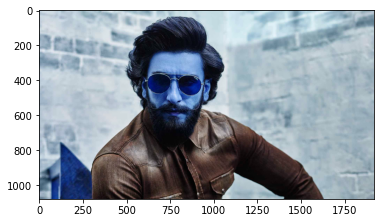

In [14]:
plt.imshow(img)

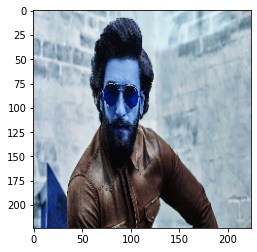

In [15]:
plt.imshow(img_resized)

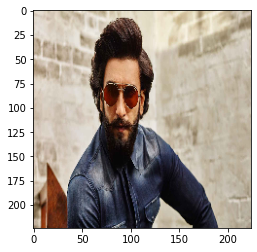

In [16]:
plt.imshow(cv2.cvtColor(img_resized,cv2.COLOR_BGR2RGB))

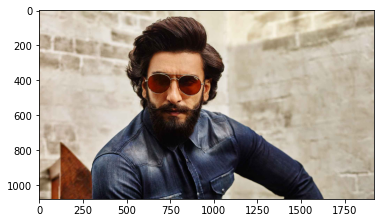

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                              target_size=(width,height),
                                              batch_size=32,
                                              class_mode='categorical')

Found 489 images belonging to 4 classes.


In [21]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                              target_size=(width,height),
                                              batch_size=6,
                                              class_mode='categorical')

Found 24 images belonging to 4 classes.


In [22]:
IMAGE_SIZE=[224,224]

#add preprocessing layer to thr front of vgg
vgg=VGG16(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)

#dont train existing weights
for layer in vgg.layers:
  layer.trainable=False

In [23]:
#useful for getting  number of classes
folders=glob('/content/drive/MyDrive/Dataset/Train/*')

#our layers,you can add more if you want
x=Flatten()(vgg.output)
x=Dense(1000,activation='relu')(x)
prediction=Dense(len(folders),activation='softmax')(x)

#create a model object
model=Model(inputs=vgg.input,outputs=prediction)

#view the structure of models

model.summary()
#tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
folders

['/content/drive/MyDrive/Dataset/Train/Salman_khan',
 '/content/drive/MyDrive/Dataset/Train/Shahrukh_khan',
 '/content/drive/MyDrive/Dataset/Train/Ranbeer_kapoor',
 '/content/drive/MyDrive/Dataset/Train/Ranveer_Singh']

In [25]:
#fit the model

r=model.fit_generator(training_set,validation_data=test_set,epochs=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/2
 4/16 [======>.......................] - ETA: 4:59 - loss: 20.8482 - accuracy: 0.2344

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


16/16 [==============================] - 414s 25s/step - loss: 10.3963 - accuracy: 0.3252 - val_loss: 3.7963 - val_accuracy: 0.4583
Epoch 2/2
16/16 [==============================] - 263s 16s/step - loss: 1.3352 - accuracy: 0.6155 - val_loss: 1.2342 - val_accuracy: 0.4167


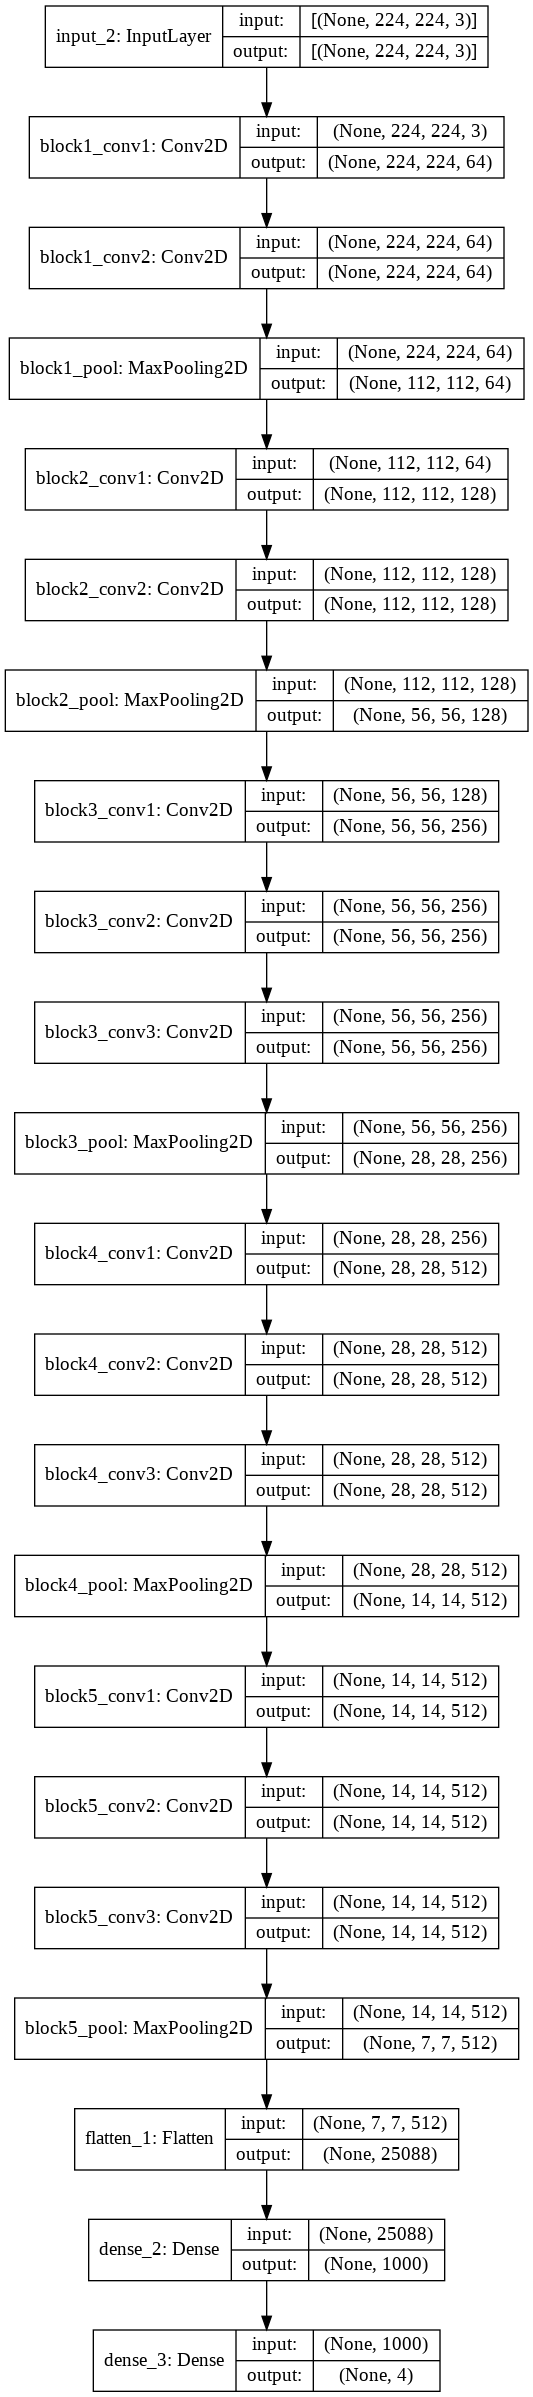

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)